In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import seaborn as sns

luno = pd.read_csv("data.csv", header=0)

In [3]:
luno.head()

,age,job_type,marital_status,education_type,monthly_income,contact_information_type,durations,contacted_current_campaign,contacted_previous_campaign,did_buy_previous_campaign,did_buy_current_campaign
0,58,management,married,tertiary,2143,unknown,261,1,0,unknown,no
1,47,blue-collar,married,unknown,1506,unknown,92,1,0,unknown,no
2,51,management,married,tertiary,10635,unknown,336,1,0,unknown,no
3,44,services,divorced,secondary,2586,unknown,160,1,0,unknown,no
4,54,blue-collar,married,secondary,1291,unknown,266,1,0,unknown,no


In [4]:
for col in luno.columns:
    pct_missing = np.mean(luno[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

age - 0%
job_type - 0%
marital_status - 0%
education_type - 0%
monthly_income - 0%
contact_information_type - 0%
durations - 0%
contacted_current_campaign - 0%
contacted_previous_campaign - 0%
did_buy_previous_campaign - 0%
did_buy_current_campaign - 0%


In [5]:
luno.sort_values('job_type')

,age,job_type,marital_status,education_type,monthly_income,contact_information_type,durations,contacted_current_campaign,contacted_previous_campaign,did_buy_previous_campaign,did_buy_current_campaign
11095,46,admin.,divorced,primary,1807,cellular,62,3,2,failure,no
1164,31,admin.,single,tertiary,1583,unknown,207,1,0,unknown,no
3012,41,admin.,married,tertiary,1287,unknown,286,1,0,unknown,no
2167,30,admin.,single,secondary,3809,unknown,159,4,0,unknown,no
8823,32,admin.,single,secondary,1630,cellular,122,1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
2477,58,unknown,married,tertiary,4150,unknown,363,1,0,unknown,no
3193,45,unknown,married,unknown,1979,unknown,76,3,0,unknown,no
2482,56,unknown,divorced,unknown,2152,unknown,67,1,0,unknown,no
12904,64,unknown,married,unknown,2280,telephone,289,1,0,unknown,no


In [6]:
def skewness(r):
    """
    Alternative to scipy.stats.skew()
    Computes the skewness of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**3).mean()
    return exp/sigma_r**3

In [7]:
sk = skewness(luno.durations)
sk

3.0955098074575953

In [8]:
import scipy.stats

def is_normal(r, level=0.01):
    """
    Applies the Jarque-Bera test to determine if a Series is normal or not
    Test is applied at the 1% level by default
    Returns True if the hypothesis of normality is accpeted, False otherwise
    """
    statistic, p_value = scipy.stats.jarque_bera(r)
    return p_value > level

In [9]:
nd = is_normal(luno.durations, level=0.03)
nd

False

In [10]:
def kurtosis(r):
    """
    Alternative to scipy.stats.kurtosis()
    Computes the kurtosis of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**4).mean()
    return exp/sigma_r**4

In [11]:
k = kurtosis(luno.durations)
k

21.549011120489684

ValueError: x and y must have same first dimension, but have shapes (1000,) and (14641,)

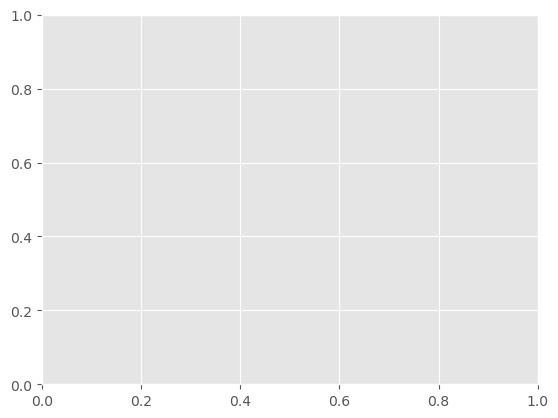

In [18]:
import pylab as p

x1 = np.linspace( -5, 5, 1000 )
y1 = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x1)**2  )

p.plot(x1, luno.durations, "*")
sk(luno.durations)

In [ ]:
# My conlusing is that the data of the durations of the calls are positively-skewed